In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap.umap_ as umap
import xarray as xr
import pandas as pd

gene_reference = pd.read_csv('gene.csv')
samples = np.load('samples.npy')
samples43 = np.load('samples43Regions.npy')


c:\Users\fjpgr\anaconda3\envs\TF\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


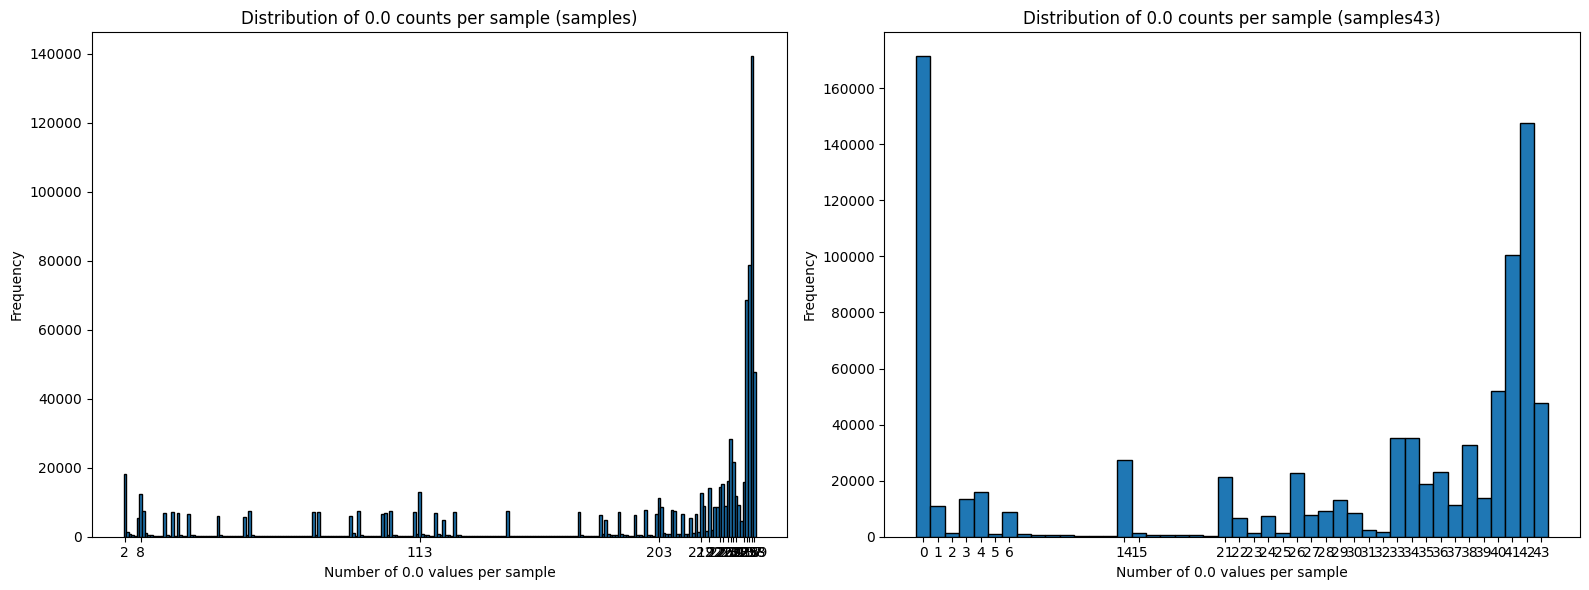

In [2]:
# Count the number of 0.0 values per sample for samples
zero_counts_samples = np.sum(samples == 0.0, axis=1)
# Create bins so that each integer count is centered nicely:
bins_samples = np.arange(zero_counts_samples.min(), zero_counts_samples.max() + 2) - 0.5

# Count the number of 0.0 values per sample for samples43
zero_counts_samples43 = np.sum(samples43 == 0.0, axis=1)
bins_samples43 = np.arange(zero_counts_samples43.min(), zero_counts_samples43.max() + 2) - 0.5

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Left subplot for samples
counts_samples, bins_samples, patches_samples = axs[0].hist(zero_counts_samples, bins=bins_samples, edgecolor='black')
axs[0].set_xlabel('Number of 0.0 values per sample')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of 0.0 counts per sample (samples)')

# Calculate bin centers and select tick positions for samples
bin_centers_samples = (bins_samples[:-1] + bins_samples[1:]) / 2
nonzero_tick_values_samples = bin_centers_samples[counts_samples > 10000]
axs[0].set_xticks(nonzero_tick_values_samples)

# Right subplot for samples43
counts_samples43, bins_samples43, patches_samples43 = axs[1].hist(zero_counts_samples43, bins=bins_samples43, edgecolor='black')
axs[1].set_xlabel('Number of 0.0 values per sample')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of 0.0 counts per sample (samples43)')

# Calculate bin centers and select tick positions for samples43
bin_centers_samples43 = (bins_samples43[:-1] + bins_samples43[1:]) / 2
nonzero_tick_values_samples43 = bin_centers_samples43[counts_samples43 > 1000]
axs[1].set_xticks(nonzero_tick_values_samples43)

plt.tight_layout()
plt.show()


In [ ]:
print(np.sum(zero_counts_samples > int(239*0.95)))
print(np.sum(zero_counts_samples43 > int(43*0.95)))

450935
296045


#### UMAP but data is too big:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap

# Suppose your data is stored in a variable called "samples" with shape (n_samples, 239)
# For demonstration, let's create some dummy data:
# samples = np.random.randn(900000, 239)  # Replace with your actual data

# ----- PCA -----
# Run PCA on all 239 dimensions
pca_full = PCA(n_components=239)
pca_full.fit(samples)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components needed to capture at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of PCA components capturing 95% variance:", n_components_95)

# Now, transform your data using PCA with the number of components capturing 95% variance
pca_reducer = PCA(n_components=n_components_95)
reduced_data = pca_reducer.fit_transform(samples)
print("Reduced data shape:", reduced_data.shape)

In [ ]:
# ----- UMAP -----
# Now perform UMAP on the PCA-reduced data
umap_embedder = umap.UMAP(n_components=2, random_state=42)
embedding = umap_embedder.fit_transform(reduced_data)
print("UMAP embedding shape:", embedding.shape)

# Plot the UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], s=1)
plt.title("UMAP Embedding on PCA-Reduced Data")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

# PCA

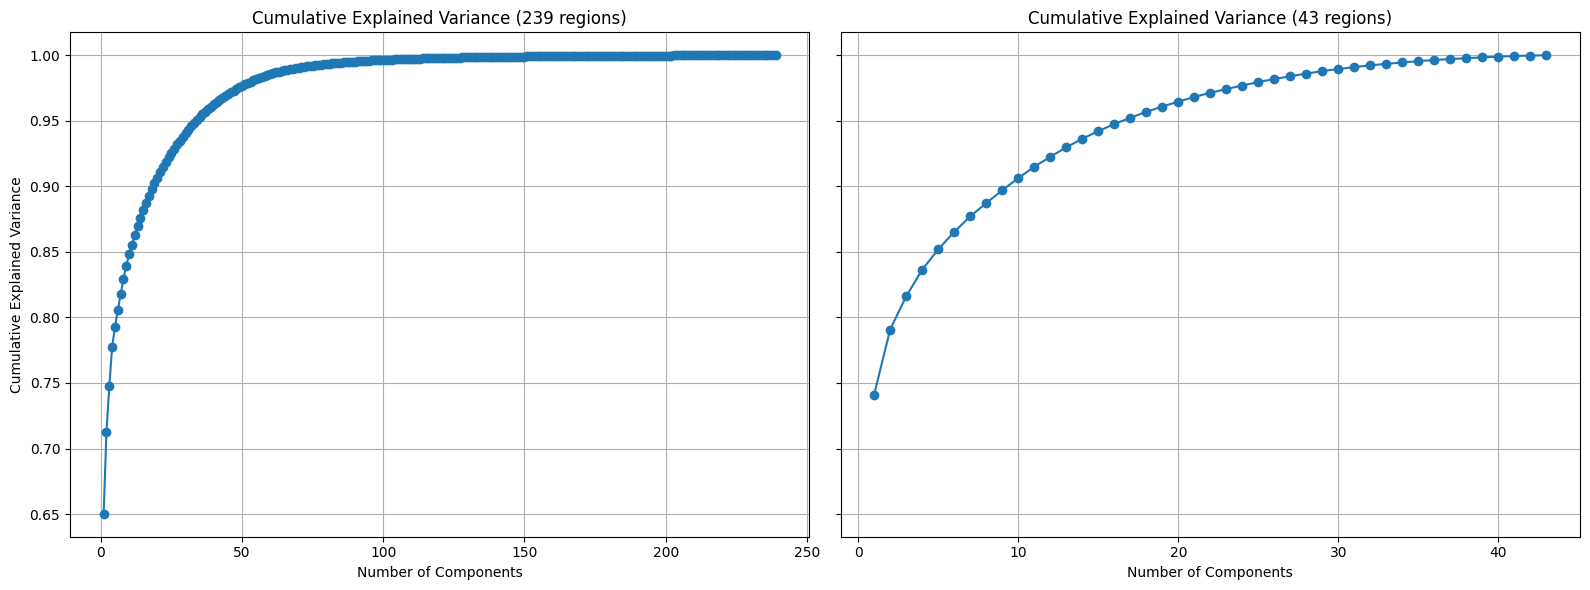

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- For samples with 239 features ---
num_features_239 = 239
pca_239 = PCA(n_components=num_features_239)
pca_239.fit(samples)

explained_variance_239 = pca_239.explained_variance_ratio_
cumulative_variance_239 = np.cumsum(explained_variance_239)

# print("Explained Variance Ratio per PCA Component for 239 features:")
# for i, (ev, cv) in enumerate(zip(explained_variance_239, cumulative_variance_239)):
#     print(f"Component {i+1:3d}: {ev:.4f} (Cumulative: {cv:.4f})")

# --- For samples with 43 features (samples43) ---
num_features_43 = 43
pca_43 = PCA(n_components=num_features_43)
pca_43.fit(samples43)

explained_variance_43 = pca_43.explained_variance_ratio_
cumulative_variance_43 = np.cumsum(explained_variance_43)

# print("\nExplained Variance Ratio per PCA Component for 43 features:")
# for i, (ev, cv) in enumerate(zip(explained_variance_43, cumulative_variance_43)):
#     print(f"Component {i+1:3d}: {ev:.4f} (Cumulative: {cv:.4f})")

# --- Plotting both cumulative explained variance plots as subplots ---
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for the 239-dimensional samples
axs[0].plot(range(1, num_features_239 + 1), cumulative_variance_239, marker='o', linestyle='-')
axs[0].set_title("Cumulative Explained Variance (239 regions)")
axs[0].set_xlabel("Number of Components")
axs[0].set_ylabel("Cumulative Explained Variance")
axs[0].grid(True)

# Plot for the 43-dimensional samples (samples43)
axs[1].plot(range(1, num_features_43 + 1), cumulative_variance_43, marker='o', linestyle='-')
axs[1].set_title("Cumulative Explained Variance (43 regions)")
axs[1].set_xlabel("Number of Components")
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
samples239pca = pca.fit_transform(samples)
samples43pca = pca.fit_transform(samples43)

# Align subclasses to the corresponding classes
cell_df = pd.read_csv('mouseCellTypesWithClass.csv')
subclass_to_class = cell_df['class'].to_dict()
numCellTypes = 104
numGeneTypes = 8460 
sampleSubclassLabels = np.tile(np.arange(numCellTypes), numGeneTypes)
cellClassLabels = np.array([subclass_to_class[sub] for sub in sampleSubclassLabels])
uniqueClasses = np.unique(cellClassLabels)
# Create a mapping dictionary: e.g. {"01 IT-ET Glut": 0, "34 Immune": 1, ...}
classToNumeric = {cls: i for i, cls in enumerate(uniqueClasses)}
# Convert the string labels to numeric labels using the dictionary
classLabelsNumeric = np.array([classToNumeric[cls] for cls in cellClassLabels])

# Create a custom colormap for 22 distinct classes.
numClasses = len(cell_df['class'].unique())  # should be 22
base_cmap = plt.cm.get_cmap('gist_ncar', numClasses)
colors = base_cmap(np.linspace(0, 1, numClasses))
custom_cmap = ListedColormap(colors)

C:\Users\fjpgr\AppData\Local\Temp\ipykernel_21172\2762940035.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap('gist_ncar', numClasses)


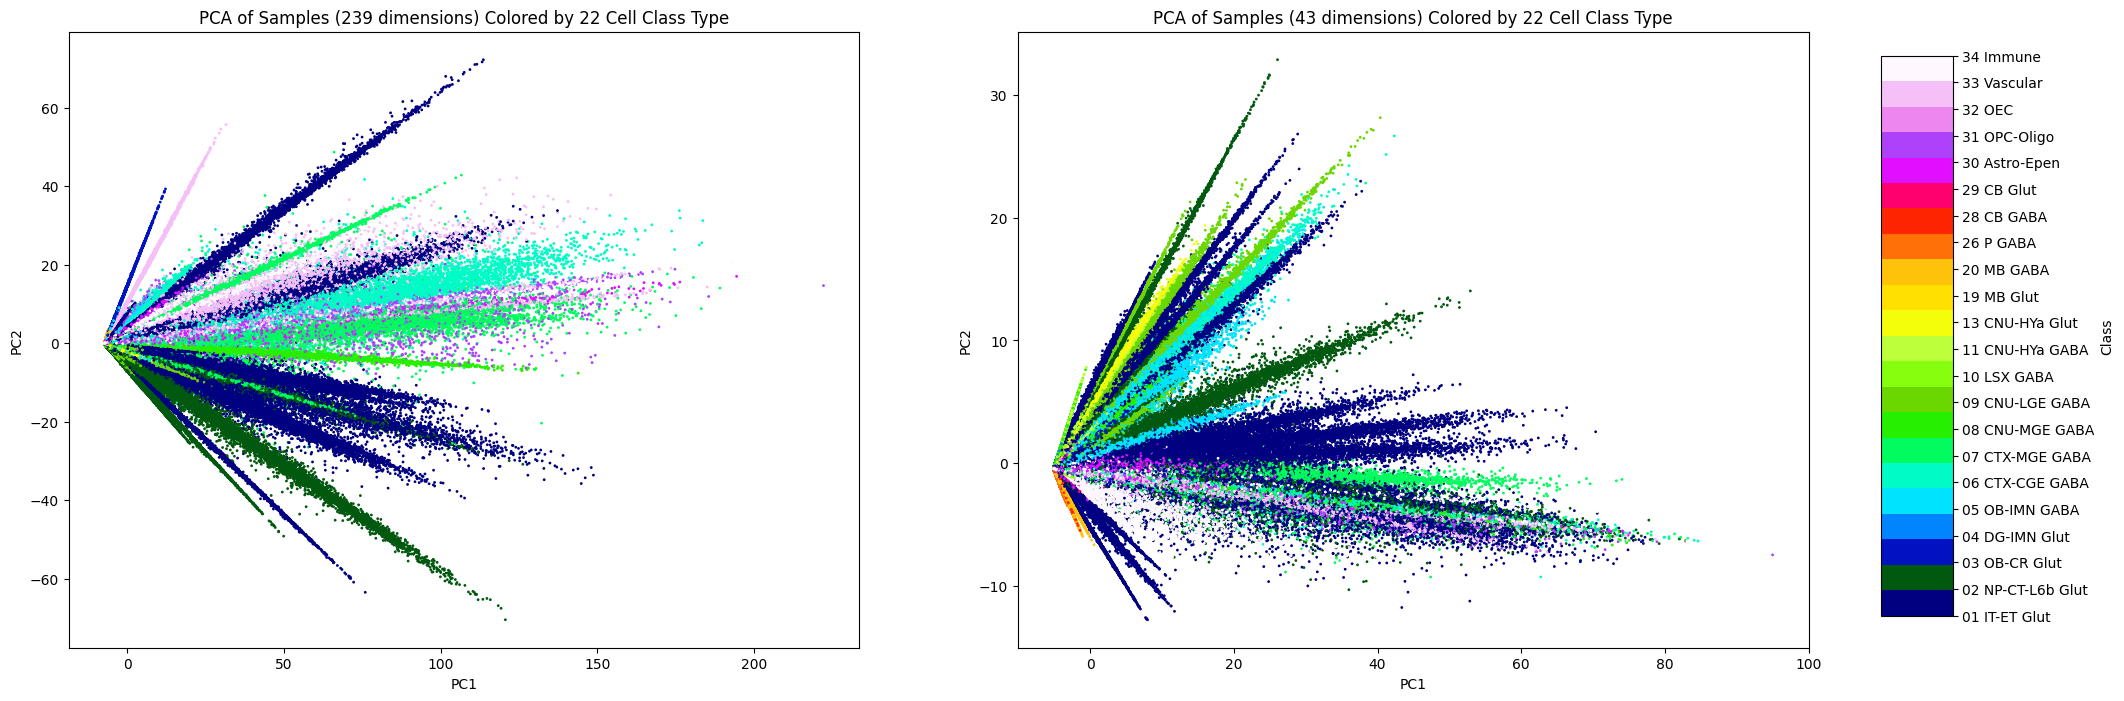

In [9]:
# Create subplots and leave extra space on the right for a shared colorbar.
fig, axs = plt.subplots(1, 2, figsize=(24, 8))
plt.subplots_adjust(right=0.85)  # leave space on the right

# Left subplot: PCA for samples239pca
scatter1 = axs[0].scatter(samples239pca[:, 0], samples239pca[:, 1],
                          c=classLabelsNumeric, cmap=custom_cmap, s=1)
axs[0].set_title('PCA of Samples (239 dimensions) Colored by 22 Cell Class Type')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

# Right subplot: PCA for samples43pca
scatter2 = axs[1].scatter(samples43pca[:, 0], samples43pca[:, 1],
                          c=classLabelsNumeric, cmap=custom_cmap, s=1)
axs[1].set_title('PCA of Samples (43 dimensions) Colored by 22 Cell Class Type')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

# Create a separate axes for the shared colorbar on the right side.
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
cbar = fig.colorbar(scatter1, cax=cbar_ax, ticks=np.arange(numClasses))
cbar.set_label('Class')
cbar.ax.set_yticklabels(uniqueClasses)

plt.show()

C:\Users\fjpgr\AppData\Local\Temp\ipykernel_21172\1365151637.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap('gist_ncar', numCellTypes)
C:\Users\fjpgr\AppData\Local\Temp\ipykernel_21172\1365151637.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(uniqueClasses)


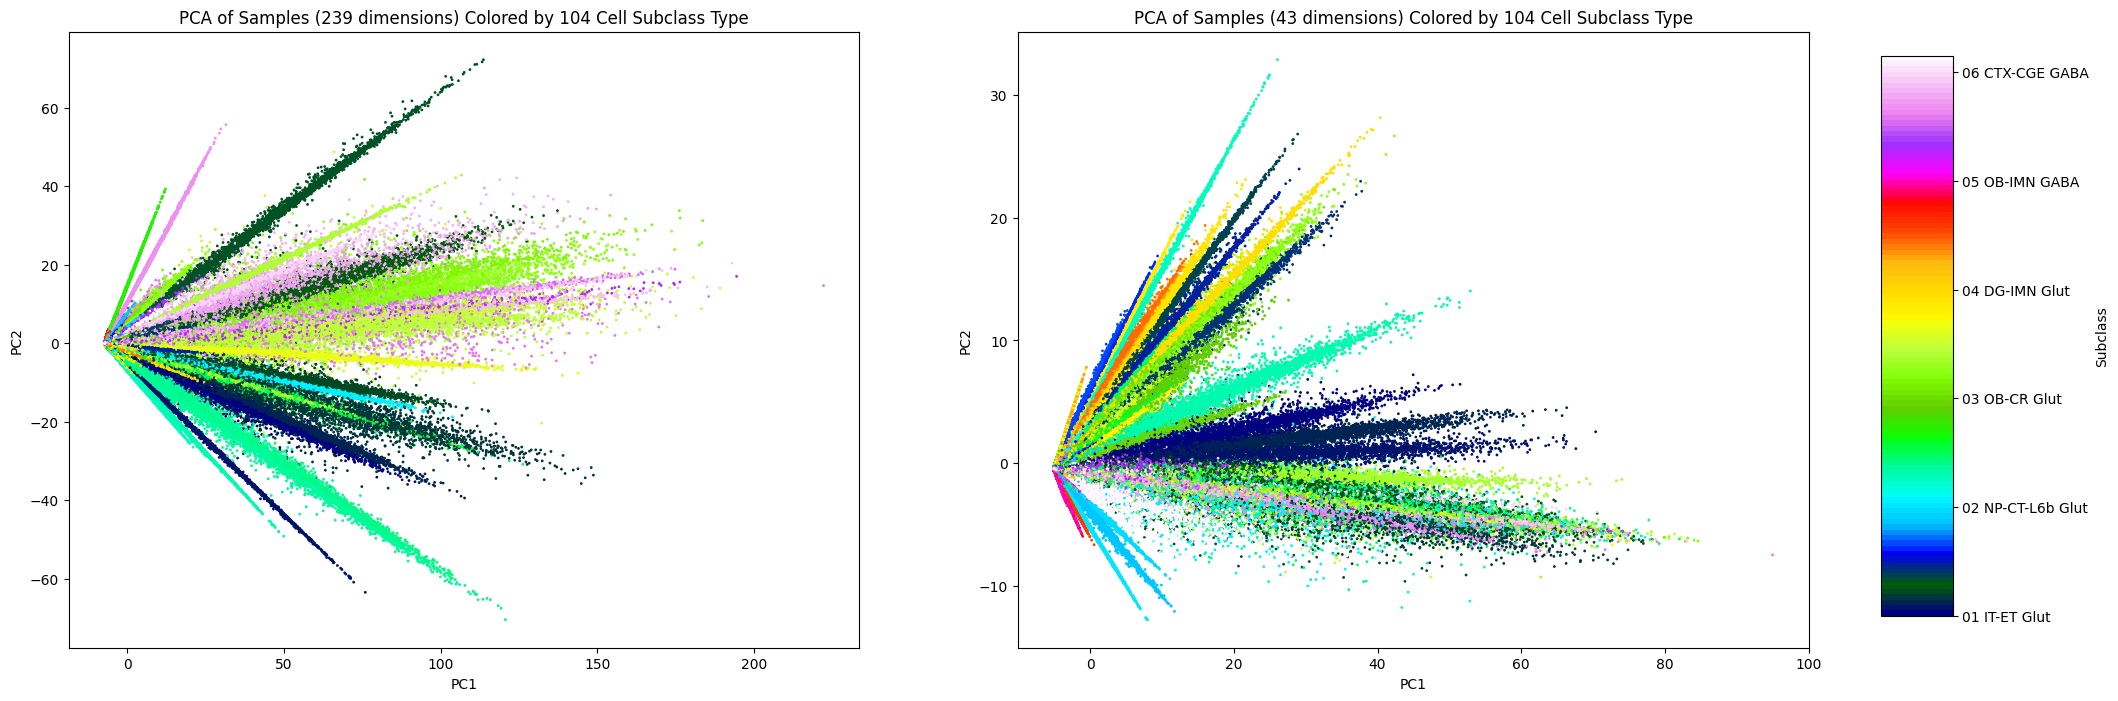

In [18]:
# Get a continuous colormap and discretize it to 104 colors
base_cmap = plt.cm.get_cmap('gist_ncar', numCellTypes)
colors = base_cmap(np.linspace(0, 1, numCellTypes))
custom_cmap = ListedColormap(colors)

# Create subplots and leave extra space on the right for a shared colorbar.
fig, axs = plt.subplots(1, 2, figsize=(24, 8))
plt.subplots_adjust(right=0.85)  # leave space on the right

# Left subplot: PCA for samples239pca
scatter1 = axs[0].scatter(samples239pca[:, 0], samples239pca[:, 1],
                          c=sampleSubclassLabels, cmap=custom_cmap, s=1)
axs[0].set_title('PCA of Samples (239 dimensions) Colored by 104 Cell Subclass Type')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

# Right subplot: PCA for samples43pca
scatter2 = axs[1].scatter(samples43pca[:, 0], samples43pca[:, 1],
                          c=sampleSubclassLabels, cmap=custom_cmap, s=1)
axs[1].set_title('PCA of Samples (43 dimensions) Colored by 104 Cell Subclass Type')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

# Create a separate axes for the shared colorbar on the right side.
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
cbar = fig.colorbar(scatter1, cax=cbar_ax)
cbar.set_label('Subclass')
cbar.ax.set_yticklabels(uniqueClasses)

plt.show()

C:\Users\fjpgr\AppData\Local\Temp\ipykernel_17636\1224060199.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap('gist_ncar', numCellTypes)


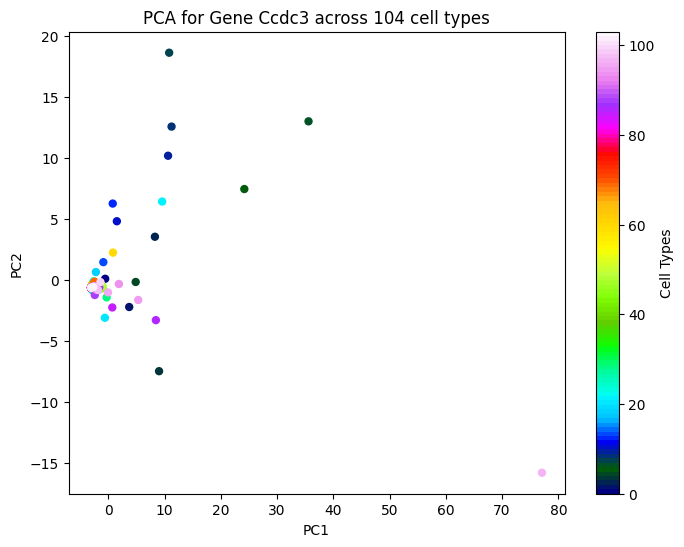

In [ ]:
# Assuming samples has shape (8460 * 104, 239)
cell_types = 104  # Number of rows per subject
gene = 'Ccdc3'
gene_idx = gene_reference[gene_reference['gene_symbol']==gene].index.item()

# Extract rows corresponding to the third subject
gene_samples = samples[gene_idx * cell_types : (gene_idx + 1) * cell_types, :]

# Perform PCA on just this subject's samples (104 x 239)
pca = PCA(n_components=2)
subject_pca = pca.fit_transform(gene_samples)

# Get a continuous colormap and discretize it to 104 colors
base_cmap = plt.cm.get_cmap('gist_ncar', numCellTypes)
colors = base_cmap(np.linspace(0, 1, numCellTypes))
custom_cmap = ListedColormap(colors)

# Plot the PCA results, colored by parcel label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(subject_pca[:, 0], subject_pca[:, 1], c=np.arange(numCellTypes), cmap=custom_cmap, s=25)
plt.colorbar(scatter, label='Cell Types')
plt.title(f'PCA for Gene {gene} across 104 cell types')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Adding class to the subclasses

In [ ]:
# Open the dataset
ds = xr.open_dataset('aggregated_data.nc')

# Assuming 'subclass' is a 1D variable (an array of strings)
cellType_values = ds['subclass'].values

# Create a DataFrame with two columns: one for the code and one for the description
df = pd.DataFrame(cellType_values, columns=['subclass'])

# Save the DataFrame to a CSV file
df.to_csv('mouseCellTypes.csv', index=True, index_label='index')

CSV file saved as 'subclass_split.csv'


In [54]:
df_second = pd.read_csv(r"D:\Mouse\GeneExpressions\metadata\WMB-taxonomy\20231215\views\cluster_to_cluster_annotation_membership_pivoted.csv")    # This CSV has a column 'subclass'
df_first = pd.read_csv('mouseCellTypes.csv')

df_merged = pd.merge(df_first, df_second[['subclass', 'class']], on='subclass', how='left')
df_merged = df_merged.drop_duplicates()
df_merged.to_csv('mouseCellTypesWithClass.csv', index=False)

# Merging the data to the 43 regions

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np

# ----- Step 1: Load the taxonomy CSV -----
# Assume the CSV has columns: 'parcellation_index', 'organ', 'category', 'division', 'structure', 'substructure'
taxonomy = pd.read_csv(r"D:\Mouse\GeneExpressions\metadata\Allen-CCF-2020\20230630\views\parcellation_to_parcellation_term_membership_acronym.csv")

# Set the index to 'parcellation_index' for easy lookup.
taxonomy.set_index("parcellation_index", inplace=True)

# ----- Step 2: Load the xarray dataset -----
ds = xr.open_dataset("aggregated_data.nc")
# The dataset has coordinates: gene_symbol, parcellation_index, subclass

# ----- Step 3: Map parcellation_index to structure -----
# For each parcellation_index in ds, look up its corresponding structure from the taxonomy
# We assume that ds.parcellation_index values match the values in the CSV.
structure_coords = [taxonomy.loc[idx, "structure"] for idx in ds.coords["parcellation_index"].values]

# Assign a new coordinate 'structure' to the dataset along the parcellation_index dimension.
ds = ds.assign_coords(structure=("parcellation_index", structure_coords))

# ----- Step 4: Group the data by the 'structure' coordinate -----
# For example, to average the data within each structure:
ds_grouped = ds.groupby("structure").mean(dim="parcellation_index")

In [5]:
mean_data = ds_grouped["mean"].values  # shape: (43, 8640, 104)
mean_data_permuted = np.transpose(mean_data, (1, 2, 0))
# Then reshape to (8460*104, 239)
samples43 = mean_data_permuted.reshape(-1, mean_data.shape[0])
print("Samples shape:", samples43.shape)  # Expected: (8460*104, 239)

# Option 1: Replace NaNs with zeros
samples43 = np.nan_to_num(samples43, nan=0.0)

np.save("samples43Regions.npy", samples43)

Samples shape: (879840, 43)


# Proof showing that the labelling in PCA is sound

In [10]:
import numpy as np

# Create dummy data that mimics your original mean_data shape (8460, 239, 104)
# For demonstration purposes, we'll use smaller numbers:
num_subjects = 5      # instead of 8460
num_features = 5    # stays the same
num_parcels = 4       # instead of 104

# Create dummy mean_data with shape (num_subjects, num_features, num_parcels)
mean_data = np.random.rand(num_subjects, num_features, num_parcels)

# Permute dimensions to get shape (num_subjects, num_parcels, num_features)
mean_data_permuted = np.transpose(mean_data, (0, 2, 1))
print("Shape of mean_data_permuted:", mean_data_permuted.shape)  # (5, 4, 239)

# Reshape to combine the first two dimensions into one:
samples = mean_data_permuted.reshape(-1, num_features)
print("Shape of samples:", samples.shape)  # (5*4, 239) -> (20, 239)

# Let's choose a specific subject and parcel.
# For example, subject index 3 and parcel index 2:
subject_index = 3
parcel_index = 2

# In the reshaped samples, the corresponding row index is:
row_index = subject_index * num_parcels + parcel_index

print("\nRow in 'samples' at index {}:".format(row_index))
print(samples[row_index])

print("\nCorresponding row in 'mean_data_permuted' for subject {} and parcel {}:".format(subject_index, parcel_index))
print(mean_data_permuted[subject_index, parcel_index, :])

# They should be exactly the same.
print("\nAre they equal?", np.allclose(samples[row_index], mean_data_permuted[subject_index, parcel_index, :]))


Shape of mean_data_permuted: (5, 4, 5)
Shape of samples: (20, 5)

Row in 'samples' at index 14:
[0.31050204 0.58590083 0.62109435 0.97584156 0.80135356]

Corresponding row in 'mean_data_permuted' for subject 3 and parcel 2:
[0.31050204 0.58590083 0.62109435 0.97584156 0.80135356]

Are they equal? True
